In [535]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

# Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [537]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IS/chaiyo.xlsx", skiprows=1, parse_dates=['DOB','System CAR Code Date'])
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,Day Past Due (Aging),Application Status
0,25650701INSI00001,7400.12,NaN,NaN,NaN,F,1984-08-29,พนักงานบริษัท,15000.0,NaN,...,NaN,NaN,NaN,NaN,MVS2022040181327,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED
1,25650701RET100001,150000.00,150000.00,150000.00,4.0,M,1958-10-21,เกษตรกร,50000.0,4WH,...,D-MAX,2007.0,ZL,290500.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED
2,25650701REUC00002,163800.00,163800.00,163800.00,48.0,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,ALMERA,2017.0,AT,234000.0,NLG224034612,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED
3,25650701REUC00003,127500.00,127438.50,127438.50,60.0,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,YARIS,2006.0,DH,170000.0,NLG224034615,S1,2022-07-01,S1,14.0,APPLICATION_COMPLETED
4,25650701REUC00004,223200.00,220986.53,220986.53,60.0,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,TRITON,2014.0,BC,343500.0,NLG224034666,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED


In [538]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

In [539]:
print(df.shape)
df.tail()

(26715, 22)


,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age
26710,25650927ULMB00166,27000.0,27000.0,27028.0,36.0,M,1980-10-12,รับจ้างทั่วไป,20000.0,NaN,...,2018.0,DH,43000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,42
26711,25650927ULMB00167,10000.0,10000.0,10010.0,12.0,M,1960-03-09,รับจ้างทั่วไป,10000.0,NaN,...,2009.0,AF,19000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,62
26712,25650927ULMB00168,24000.0,24000.0,24024.0,30.0,F,1993-12-12,พนักงานบริษัท,12000.0,NaN,...,2016.0,AH,32000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,29
26713,25650927ULMB00170,20000.0,20000.0,20020.0,36.0,F,1991-08-11,ผู้ประกอบการ,8000.0,NaN,...,2017.0,CX,44000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,31
26714,25650927ULMB00171,NaN,NaN,NaN,NaN,F,1993-12-02,รับจ้างทั่วไป,12000.0,NaN,...,NaN,NaN,NaN,NaN,S1,2022-09-28,S1,0.0,PENDING_CREDIT_DECISION,29


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26715 entries, 0 to 26714
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             26715 non-null  object        
 1   Principal Approve Amount       25445 non-null  float64       
 2   Principal Amount               24825 non-null  float64       
 3   Outstanding Balance Amount     24825 non-null  float64       
 4   Repayment Tenor Month Number   24825 non-null  float64       
 5   Gender                         26583 non-null  object        
 6   DOB                            26715 non-null  datetime64[ns]
 7   Occupation Description         26585 non-null  object        
 8   Total Income Amount (Month)    26585 non-null  float64       
 9   Collateral Type Code           8614 non-null   object        
 10  Vehicle Brand                  25535 non-null  object        
 11  Vehicle Model  

In [541]:
df.isna().sum()

Application Number                   0
Principal Approve Amount          1270
Principal Amount                  1890
Outstanding Balance Amount        1890
Repayment Tenor Month Number      1890
Gender                             132
DOB                                  0
Occupation Description             130
Total Income Amount (Month)        130
Collateral Type Code             18101
Vehicle Brand                     1180
Vehicle Model                     1068
Vehicle Release Year              1068
Vehicle Sub Model                 1068
Evaluation Amount                 1067
Insurance Policy Number           3638
System CAR Code (Daily)           1187
System CAR Code Date              1187
Final CAR Code Previous Month     1187
DPD                               1176
Application Status                   0
age                                  0
dtype: int64

# Data Cleaning

In [542]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,DPD,age
count,2.544500e+04,2.482500e+04,2.482500e+04,24825.000000,2.658500e+04,25647.000000,2.564800e+04,25539.000000,26715.000000
mean,1.089474e+05,1.092416e+05,1.094217e+05,38.586667,2.934219e+04,2012.206184,1.764770e+05,0.951055,42.098110
std,1.144521e+05,1.145533e+05,1.147258e+05,17.348341,8.121714e+04,5.459269,1.800489e+05,3.871248,10.779831
min,3.000000e+03,4.666000e+01,4.666000e+01,1.000000,0.000000e+00,1987.000000,5.000000e+03,0.000000,8.000000
25%,2.600000e+04,2.600000e+04,2.602600e+04,24.000000,1.500000e+04,2008.000000,3.850000e+04,0.000000,34.000000
50%,5.000000e+04,5.400000e+04,5.405400e+04,36.000000,2.000000e+04,2013.000000,1.330000e+05,0.000000,41.000000
75%,1.730000e+05,1.739846e+05,1.743750e+05,60.000000,3.000000e+04,2017.000000,2.705000e+05,0.000000,50.000000
max,1.500000e+06,1.500000e+06,1.500000e+06,60.000000,7.091166e+06,2022.000000,3.282500e+06,72.000000,71.000000


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26715 entries, 0 to 26714
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             26715 non-null  object        
 1   Principal Approve Amount       25445 non-null  float64       
 2   Principal Amount               24825 non-null  float64       
 3   Outstanding Balance Amount     24825 non-null  float64       
 4   Repayment Tenor Month Number   24825 non-null  float64       
 5   Gender                         26583 non-null  object        
 6   DOB                            26715 non-null  datetime64[ns]
 7   Occupation Description         26585 non-null  object        
 8   Total Income Amount (Month)    26585 non-null  float64       
 9   Collateral Type Code           8614 non-null   object        
 10  Vehicle Brand                  25535 non-null  object        
 11  Vehicle Model  

## **ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไหร่**

In [544]:
missing = df.isnull().sum()
missing

Application Number                   0
Principal Approve Amount          1270
Principal Amount                  1890
Outstanding Balance Amount        1890
Repayment Tenor Month Number      1890
Gender                             132
DOB                                  0
Occupation Description             130
Total Income Amount (Month)        130
Collateral Type Code             18101
Vehicle Brand                     1180
Vehicle Model                     1068
Vehicle Release Year              1068
Vehicle Sub Model                 1068
Evaluation Amount                 1067
Insurance Policy Number           3638
System CAR Code (Daily)           1187
System CAR Code Date              1187
Final CAR Code Previous Month     1187
DPD                               1176
Application Status                   0
age                                  0
dtype: int64

## **แสดง columns ทั้งหมดที่มี null values เก็บไว้ในตัวแปล**

In [545]:
missing_columns = list(missing[missing > 0].index)
missing_columns

['Principal Approve Amount',
 'Principal Amount',
 'Outstanding Balance Amount',
 'Repayment Tenor Month Number',
 'Gender',
 'Occupation Description',
 'Total Income Amount (Month)',
 'Collateral Type Code',
 'Vehicle Brand',
 'Vehicle Model',
 'Vehicle Release Year',
 'Vehicle Sub Model',
 'Evaluation Amount',
 'Insurance Policy Number',
 'System CAR Code (Daily)',
 'System CAR Code Date',
 'Final CAR Code Previous Month',
 'DPD']

## **คำนวณ % ค่าว่างของทั้ง 18 columns**

In [546]:
total_missing = missing[missing > 0]
total_missing

Principal Approve Amount          1270
Principal Amount                  1890
Outstanding Balance Amount        1890
Repayment Tenor Month Number      1890
Gender                             132
Occupation Description             130
Total Income Amount (Month)        130
Collateral Type Code             18101
Vehicle Brand                     1180
Vehicle Model                     1068
Vehicle Release Year              1068
Vehicle Sub Model                 1068
Evaluation Amount                 1067
Insurance Policy Number           3638
System CAR Code (Daily)           1187
System CAR Code Date              1187
Final CAR Code Previous Month     1187
DPD                               1176
dtype: int64

In [547]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

,number_of_missing_values
Principal Approve Amount,1270
Principal Amount,1890
Outstanding Balance Amount,1890
Repayment Tenor Month Number,1890
Gender,132
Occupation Description,130
Total Income Amount (Month),130
Collateral Type Code,18101
Vehicle Brand,1180
Vehicle Model,1068


In [548]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

,number_of_missing_values,percent
Principal Approve Amount,1270,4.753884
Principal Amount,1890,7.074677
Outstanding Balance Amount,1890,7.074677
Repayment Tenor Month Number,1890,7.074677
Gender,132,0.494104
Occupation Description,130,0.486618
Total Income Amount (Month),130,0.486618
Collateral Type Code,18101,67.755942
Vehicle Brand,1180,4.416994
Vehicle Model,1068,3.997754


**ตรวจสอบ Data type ในแต่ละ columns ที่มี null values**

In [549]:
for c in missing_columns:
  print(c, ":", df[c].dtype)

Principal Approve Amount : float64
Principal Amount : float64
Outstanding Balance Amount : float64
Repayment Tenor Month Number : float64
Gender : object
Occupation Description : object
Total Income Amount (Month) : float64
Collateral Type Code : object
Vehicle Brand : object
Vehicle Model : object
Vehicle Release Year : float64
Vehicle Sub Model : object
Evaluation Amount : float64
Insurance Policy Number : object
System CAR Code (Daily) : object
System CAR Code Date : datetime64[ns]
Final CAR Code Previous Month : object
DPD : float64


In [550]:
#original data size
df.shape[0]

26715

In [551]:
df.dropna(subset=['Principal Approve Amount','Principal Amount','Outstanding Balance Amount',
                  'Repayment Tenor Month Number','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year',
                  'Vehicle Sub Model','Evaluation Amount'], inplace=True)

In [552]:
df.shape

(8209, 22)

In [553]:
df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age
1,25650701RET100001,150000.0,150000.0,150000.0,4.0,M,1958-10-21,เกษตรกร,50000.0,4WH,...,2007.0,ZL,290500.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,64
72,25650701TLT100002,150000.0,150000.0,150000.0,4.0,F,1963-04-25,เกษตรกร,30000.0,4WH,...,2012.0,AA,461000.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,59
79,25650701ULCR00012,100000.0,100000.0,100000.0,60.0,F,1982-12-08,พนักงานบริษัท,14000.0,VAN,...,2012.0,GA,365000.0,NLG224074841,S1,2022-07-01,S1,8.0,APPLICATION_COMPLETED,40
138,25650701ULCR00114,300000.0,300000.0,300000.0,60.0,F,1957-05-03,STREET VENDOR,10000.0,VAN,...,2011.0,CB,493500.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,65
237,25650702RETK00002,900000.0,900000.0,900000.0,60.0,F,1978-10-09,ผู้ประกอบการ,182243.0,10W,...,2013.0,EH,1510000.0,NLG224074480,S1,2022-07-05,S1,0.0,APPLICATION_COMPLETED,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,25650808RET100002,190000.0,190000.0,190000.0,4.0,F,1959-04-13,เกษตรกร,30000.0,6WH,...,1998.0,CX,380000.0,NaN,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,63
9037,25650808RET100004,202000.0,202000.0,202000.0,4.0,M,1987-12-02,เกษตรกร,30000.0,4WH,...,2009.0,AA,289000.0,NaN,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,35
9038,25650808RET100005,150000.0,150000.0,150000.0,4.0,M,1966-07-04,เกษตรกร,50000.0,4WH,...,2004.0,AA,221000.0,NaN,S1,2022-08-09,S1,0.0,APPLICATION_COMPLETED,56
9039,25650808RET100006,200000.0,200000.0,200000.0,4.0,F,1985-04-08,เกษตรกร,15000.0,4WH,...,2014.0,AA,395000.0,NaN,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,37


In [554]:
indexApp = df[(df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')].index
df.drop(indexApp , inplace=True)

In [555]:
df.shape

(8008, 22)

In [556]:
print(df['Collateral Type Code'])

2       CAR
3       CAR
4        PU
5       CAR
6        PU
       ... 
9082     PU
9083    CAR
9084     PU
9085     PU
9086     PU
Name: Collateral Type Code, Length: 8008, dtype: object


In [557]:
df['Collateral Type Code'].value_counts()

MC     4044
CAR    2036
PU     1928
Name: Collateral Type Code, dtype: int64

In [558]:
df['Application Number'].value_counts()

25650711REUC00050    216
25650722ULMB00028      8
25650712ULCR00026      8
25650803REUM00007      8
25650720ULCR00083      8
                    ... 
25650717ULCR00024      1
25650717ULCR00023      1
25650717ULCR00020      1
25650717ULCR00017      1
25650808REUC00085      1
Name: Application Number, Length: 7744, dtype: int64

In [559]:
#df.loc[df['Principal Amount'].isna()]
df['Insurance Policy Number'].fillna(0, inplace=True)

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8008 entries, 2 to 9086
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             8008 non-null   object        
 1   Principal Approve Amount       8008 non-null   float64       
 2   Principal Amount               8008 non-null   float64       
 3   Outstanding Balance Amount     8008 non-null   float64       
 4   Repayment Tenor Month Number   8008 non-null   float64       
 5   Gender                         8007 non-null   object        
 6   DOB                            8008 non-null   datetime64[ns]
 7   Occupation Description         8008 non-null   object        
 8   Total Income Amount (Month)    8008 non-null   float64       
 9   Collateral Type Code           8008 non-null   object        
 10  Vehicle Brand                  8008 non-null   object        
 11  Vehicle Model    

In [561]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Outstanding Balance Amount       0
Repayment Tenor Month Number     0
Gender                           1
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
Insurance Policy Number          0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

In [562]:
df['Gender'] = df['Gender'].fillna(method='ffill')

# แปลงค่า float เป็น int

In [563]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(np.int64)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(np.int64)

In [564]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = 2022 - df['Vehicle Release Year']
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
2,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,44,5
3,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,14,APPLICATION_COMPLETED,36,16
4,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,45,8
5,25650701REUC00005,250000.0,246181.41,246181.41,24,F,1989-02-25,ผู้ประกอบการ,100000.0,CAR,...,AE,422500.0,NLG224034603,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,33,3
6,25650701REUC00007,300000.0,300000.00,300000.00,60,F,1986-03-13,ผู้ประกอบการ,30000.0,PU,...,AE,393500.0,NLG224034666,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,36,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,25650808REUC00079,220000.0,220000.00,220220.00,60,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,0,APPLICATION_COMPLETED,60,15
9083,25650808REUC00080,210000.0,210000.00,210220.00,60,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,14,APPLICATION_COMPLETED,64,9
9084,25650808REUC00081,280000.0,280000.00,280280.00,60,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,0,APPLICATION_COMPLETED,53,9
9085,25650808REUC00082,120000.0,120000.00,120130.00,60,F,1982-01-18,เกษตรกร,10000.0,PU,...,BT,193000.0,NLG224079256,S1,2022-08-10,S1,0,APPLICATION_COMPLETED,40,18


In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8008 entries, 2 to 9086
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             8008 non-null   object        
 1   Principal Approve Amount       8008 non-null   float64       
 2   Principal Amount               8008 non-null   float64       
 3   Outstanding Balance Amount     8008 non-null   float64       
 4   Repayment Tenor Month Number   8008 non-null   int64         
 5   Gender                         8008 non-null   object        
 6   DOB                            8008 non-null   datetime64[ns]
 7   Occupation Description         8008 non-null   object        
 8   Total Income Amount (Month)    8008 non-null   float64       
 9   Collateral Type Code           8008 non-null   object        
 10  Vehicle Brand                  8008 non-null   object        
 11  Vehicle Model    

In [566]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8008 entries, 2 to 9086
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             8008 non-null   object        
 1   Principal Approve Amount       8008 non-null   float64       
 2   Principal Amount               8008 non-null   float64       
 3   Outstanding Balance Amount     8008 non-null   float64       
 4   Repayment Tenor Month Number   8008 non-null   int64         
 5   Gender                         8008 non-null   object        
 6   DOB                            8008 non-null   datetime64[ns]
 7   Occupation Description         8008 non-null   object        
 8   Total Income Amount (Month)    8008 non-null   float64       
 9   Collateral Type Code           8008 non-null   object        
 10  Vehicle Brand                  8008 non-null   object        
 11  Vehicle Model    

In [567]:
df['DPD'].value_counts()

0     6404
3      387
8      304
14     267
11     218
5      116
18      89
33      40
26      35
20      32
23      29
29      23
41      16
38      15
44      12
35       7
19       2
16       2
13       2
4        2
72       1
32       1
64       1
15       1
49       1
7        1
Name: DPD, dtype: int64

In [568]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,DPD,age,Vehicle Age
count,8008.000000,8008.000000,8008.000000,8008.000000,8.008000e+03,8008.000000,8.008000e+03,8008.000000,8008.000000,8008.000000
mean,94236.213037,93673.945654,93977.078328,36.252498,2.726457e+04,2012.360889,1.564805e+05,2.304820,41.852647,9.639111
std,99510.067176,99408.061736,99753.671863,17.199211,4.466949e+04,5.258344,1.565880e+05,6.126094,10.740290,5.258344
min,3000.000000,46.660000,46.660000,12.000000,0.000000e+00,1994.000000,6.500000e+03,0.000000,20.000000,0.000000
25%,24000.000000,23354.315000,23388.570000,24.000000,1.500000e+04,2009.000000,3.600000e+04,0.000000,34.000000,5.000000
50%,40000.000000,39680.960000,39726.015000,36.000000,2.000000e+04,2013.000000,8.275000e+04,0.000000,41.000000,9.000000
75%,150000.000000,150000.000000,150160.000000,60.000000,3.000000e+04,2017.000000,2.455000e+05,0.000000,50.000000,13.000000
max,700000.000000,700000.000000,700710.000000,60.000000,2.000000e+06,2022.000000,2.598500e+06,72.000000,71.000000,28.000000


In [569]:
bins = [0,30,60,90]

DPD_cate = pd.cut(df['DPD'], bins=2)

In [570]:
DPD_cate

2       (-0.072, 36.0]
3       (-0.072, 36.0]
4       (-0.072, 36.0]
5       (-0.072, 36.0]
6       (-0.072, 36.0]
             ...      
9082    (-0.072, 36.0]
9083    (-0.072, 36.0]
9084    (-0.072, 36.0]
9085    (-0.072, 36.0]
9086    (-0.072, 36.0]
Name: DPD, Length: 8008, dtype: category
Categories (2, interval[float64, right]): [(-0.072, 36.0] < (36.0, 72.0]]

In [571]:
DPD_cate.describe()

count               8008
unique                 2
top       (-0.072, 36.0]
freq                7962
Name: DPD, dtype: object

In [572]:
from pandas.api.types import CategoricalDtype

pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins=2,
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
2,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
6138,25650727ULCR00102,170000.0,169238.65,169238.65,60,M,1976-05-24,ผู้ประกอบการ,50000.0,PU,...,CA,246000.0,NLG224078155,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,46,18
6137,25650727ULCR00100,130000.0,130000.00,130000.00,48,F,1999-03-15,พนักงานบริษัท,16000.0,PU,...,BA,190500.0,NLG224078149,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,23,18
6136,25650727ULCR00099,149000.0,149000.00,149159.00,60,F,1969-05-04,เกษตรกร,20000.0,PU,...,AG,214000.0,NLG224077505,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,53,9
6135,25650727ULCR00098,250000.0,250000.00,250260.00,60,M,1985-07-13,พนักงานบริษัท,30000.0,PU,...,BN,311000.0,NLG224078009,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,37,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,25650805REUM00052,33500.0,33500.00,34008.13,36,F,1991-09-23,รับจ้างทั่วไป,15000.0,MC,...,EI,45000.0,NLG224078684,S1,2022-08-05,S1,NPL,APPLICATION_COMPLETED,31,2
107,25650701ULCR00060,250000.0,250000.00,258910.00,42,M,1987-06-23,พนักงานรัฐวิสาหกิจ,65000.0,PU,...,CL,386500.0,NLG224034610,S1,2022-07-01,S1,NPL,APPLICATION_COMPLETED,35,12
3360,25650718REUC00058,142600.0,142600.00,145775.38,60,M,1980-07-07,พนักงานบริษัท,18000.0,CAR,...,AK,219500.0,0,S1,2022-07-19,S1,NPL,APPLICATION_COMPLETED,42,10
1725,25650709ULCR00019,250000.0,250000.00,258905.85,60,M,1985-12-11,ผู้ประกอบการ,35000.0,PU,...,EO,455000.0,NLG224074903,S2,2022-09-14,S1,NPL,APPLICATION_COMPLETED,37,4


#นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner

In [573]:
df[(df['Occupation Description']=='ผู้ประกอบการ')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
5,25650701REUC00005,250000.0,246181.41,246181.41,24,F,1989-02-25,ผู้ประกอบการ,100000.0,CAR,...,AE,422500.0,NLG224034603,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,3
6,25650701REUC00007,300000.0,300000.00,300000.00,60,F,1986-03-13,ผู้ประกอบการ,30000.0,PU,...,AE,393500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,6
14,25650701REUC00023,200000.0,200000.00,204286.50,60,F,1980-06-22,ผู้ประกอบการ,40000.0,CAR,...,CC,259000.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,42,7
15,25650701REUC00024,125000.0,124977.72,124977.72,48,M,1995-01-25,ผู้ประกอบการ,15000.0,CAR,...,DK,192500.0,NLG224034611,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,27,13
16,25650701REUC00025,190000.0,190000.00,193430.00,60,M,1983-09-08,ผู้ประกอบการ,25000.0,PU,...,AM,272000.0,NLG224034665,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,39,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,25650808REUC00014,120000.0,120000.00,120120.00,48,M,1955-12-16,ผู้ประกอบการ,15000.0,PU,...,DC,398500.0,0,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,67,9
9059,25650808REUC00031,246000.0,246000.00,246246.00,60,F,1976-05-01,ผู้ประกอบการ,75000.0,PU,...,AA,351500.0,NLG224078989,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,46,6
9073,25650808REUC00061,493000.0,493000.00,493503.00,24,F,1980-11-10,ผู้ประกอบการ,37212.0,CAR,...,BR,704500.0,NLG224078942,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,42,3
9076,25650808REUC00068,140000.0,140000.00,140140.00,24,M,1952-01-01,ผู้ประกอบการ,35000.0,CAR,...,BW,221500.0,0,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,70,9


In [574]:
indexApp = df[ (df['Occupation Description'] == 'ผู้ประกอบการ')].index
df.drop(indexApp , inplace=True)
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
2,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
3,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,16
4,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,8
8,25650701REUC00012,220000.0,220000.00,220000.00,48,F,1990-01-12,พนักงานบริษัท,18000.0,PU,...,AS,411500.0,NLG224034663,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,32,7
10,25650701REUC00016,276700.0,276700.00,276700.00,60,M,1989-03-01,พนักงานบริษัท,20000.0,CAR,...,AQ,366500.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,25650808REUC00079,220000.0,220000.00,220220.00,60,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,60,15
9083,25650808REUC00080,210000.0,210000.00,210220.00,60,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,64,9
9084,25650808REUC00081,280000.0,280000.00,280280.00,60,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,53,9
9085,25650808REUC00082,120000.0,120000.00,120130.00,60,F,1982-01-18,เกษตรกร,10000.0,PU,...,BT,193000.0,NLG224079256,S1,2022-08-10,S1,PL,APPLICATION_COMPLETED,40,18


In [575]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,6886.000000,6886.000000,6886.000000,6886.000000,6.886000e+03,6886.000000,6.886000e+03,6886.000000,6886.000000
mean,88682.397473,88141.677482,88418.699463,35.606157,2.372402e+04,2012.506971,1.482606e+05,41.537467,9.493029
std,95410.851577,95311.063733,95642.434815,17.040547,3.044724e+04,5.215657,1.484206e+05,10.766727,5.215657
min,3000.000000,1315.380000,1315.380000,12.000000,0.000000e+00,1994.000000,7.000000e+03,20.000000,0.000000
25%,23000.000000,22501.560000,22520.525000,24.000000,1.500000e+04,2009.000000,3.600000e+04,33.000000,5.000000
50%,36000.000000,35207.480000,35323.335000,36.000000,1.900000e+04,2013.000000,6.450000e+04,40.000000,9.000000
75%,150000.000000,146096.212500,146203.242500,60.000000,2.690000e+04,2017.000000,2.360000e+05,49.000000,13.000000
max,700000.000000,700000.000000,700710.000000,60.000000,1.200001e+06,2022.000000,1.204500e+06,71.000000,28.000000


In [576]:
#df[ (df['Total Income Amount (Month)'] == 300000)]

In [577]:
'''indexApp = df[ (df['Total Income Amount (Month)'] == 300000)].index
df.drop(indexApp , inplace=True)
df.describe()'''

"indexApp = df[ (df['Total Income Amount (Month)'] == 300000)].index\ndf.drop(indexApp , inplace=True)\ndf.describe()"

In [578]:
#df[ (df['Total Income Amount (Month)'] <= 100000)]

#Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [579]:
df['Repayment Tenor Month Number'].value_counts()

60    1762
36    1527
24    1396
12     868
18     636
48     383
30     239
54      38
42      32
50       2
20       1
40       1
14       1
Name: Repayment Tenor Month Number, dtype: int64

In [580]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 1)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 3)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 4)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
df.head(15)

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
2,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
3,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,16
4,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,8
8,25650701REUC00012,220000.0,220000.00,220000.00,48,F,1990-01-12,พนักงานบริษัท,18000.0,PU,...,AS,411500.0,NLG224034663,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,32,7
10,25650701REUC00016,276700.0,276700.00,276700.00,60,M,1989-03-01,พนักงานบริษัท,20000.0,CAR,...,AQ,366500.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,5
11,25650701REUC00017,90000.0,89940.10,89940.10,30,M,1981-03-24,พนักงานบริษัท,25000.0,CAR,...,AK,130000.0,NLG224034606,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,41,18
13,25650701REUC00022,98000.0,98000.00,98000.00,60,M,1969-03-20,พนักงานบริษัท,15000.0,CAR,...,BJ,153000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,53,17
19,25650701REUC00032,250000.0,249985.42,254444.46,60,M,1980-07-08,ข้าราชการตำรวจ,30000.0,CAR,...,BK,457500.0,NLG224034614,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,42,4
20,25650701REUC00033,30000.0,29886.61,29886.61,36,M,1974-11-27,เกษตรกร,15000.0,PU,...,AL,136500.0,NLG224034659,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,48,16
21,25650701REUC00034,179500.0,179500.00,179500.00,60,F,1993-05-31,STREET VENDOR,70000.0,PU,...,FI,256500.0,NLG224034667,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,29,10


In [581]:
df['Repayment Tenor Month Number'].value_counts()

60    1762
36    1527
24    1396
12     868
18     636
48     383
30     239
54      38
42      32
Name: Repayment Tenor Month Number, dtype: int64

#ข้อมูลที่เหลือหลังจากถูกการ Cleaning อยู่ที่ 6881 rows

In [582]:
df.shape

(6881, 23)

#ทำการแบ่งข้อมูล จาก 6881 rows แบ่งมา 3% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [583]:
#df2 = df[df['DPD']=='PL'].sample(frac=0.025, replace=True, random_state=1) #174rows
df_pl = df[df['DPD']=='PL'].sample(frac=0.03, replace=True, random_state=1)
df_pl
#df[df['DPD']=='PL']

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
6908,25650801ULCR00123,120000.0,120000.00,120120.00,48,M,1985-07-01,รับจ้างทั่วไป,30000.0,PU,...,AD,177000.0,NLG224078195,S1,2022-08-01,S1,PL,APPLICATION_COMPLETED,37,19
340,25650703REUC00012,150500.0,150500.00,150650.00,60,F,1986-03-17,พนักงานบริษัท,39000.0,CAR,...,BJ,215000.0,NLG224064387,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,36,9
5335,25650725REUM00029,33000.0,33000.00,33033.00,36,M,1987-09-27,พนักงานบริษัท,18000.0,MC,...,DU,44000.0,NLG224077117,S1,2022-07-25,S1,PL,APPLICATION_COMPLETED,35,3
6955,25650801ULMB00006,30000.0,30000.00,30030.00,36,M,1977-05-25,พนักงานส่งเอกสาร,30000.0,MC,...,DA,51000.0,NLG224078139,S1,2022-08-01,S1,PL,APPLICATION_COMPLETED,45,4
1270,25650707REUM00039,35000.0,34621.38,34621.38,36,F,1986-11-30,รับจ้างทั่วไป,10000.0,MC,...,CO,53000.0,NLG224074695,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,25650716REUC00022,118000.0,118000.00,118118.00,36,M,1990-01-02,พนักงานบริษัท,30000.0,CAR,...,BL,182000.0,NLG224076186,S1,2022-07-18,S1,PL,APPLICATION_COMPLETED,32,10
3686,25650718ULMB00173,27000.0,26338.29,26338.29,24,F,1976-12-18,STREET VENDOR,30000.0,MC,...,DG,42000.0,NLG224076204,S1,2022-07-18,S1,PL,APPLICATION_COMPLETED,46,4
3247,25650717ULCR00023,130000.0,130000.00,133680.00,60,F,1989-05-14,พนักงานบริษัท,16000.0,PU,...,BF,163000.0,NLG224076091,S1,2022-07-17,S1,PL,APPLICATION_COMPLETED,33,19
7242,25650802REUM00002,22000.0,22000.00,22022.00,18,F,1982-12-16,แม่บ้าน,13000.0,MC,...,AO,31500.0,NLG224078265,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,40,4


In [584]:
df_npl = df.loc[df['DPD']!='PL']
df_npl

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
78,25650701ULCR00011,150000.0,150000.00,154290.00,60,M,1995-03-13,STREET VENDOR,25000.0,PU,...,CR,271000.0,NLG224034667,S1,2022-07-01,S1,NPL,APPLICATION_COMPLETED,27,12
107,25650701ULCR00060,250000.0,250000.00,258910.00,42,M,1987-06-23,พนักงานรัฐวิสาหกิจ,65000.0,PU,...,CL,386500.0,NLG224034610,S1,2022-07-01,S1,NPL,APPLICATION_COMPLETED,35,12
152,25650701ULMB00016,21000.0,19887.65,20310.18,18,M,1996-04-11,STREET VENDOR,15000.0,MC,...,BP,28000.0,NLG224034634,S1,2022-07-01,S1,NPL,APPLICATION_COMPLETED,26,5
186,25650701ULMB00063,23000.0,23000.00,23737.75,36,F,1991-04-12,STREET VENDOR,7000.0,MC,...,AD,35500.0,NLG224034644,S1,2022-07-01,S1,NPL,APPLICATION_COMPLETED,31,11
211,25650701ULMB00097,35000.0,35000.00,36129.98,24,F,1992-11-18,พนักงานบริษัท,15000.0,MC,...,CB,46500.0,NLG224034636,S1,2022-07-01,S1,NPL,APPLICATION_COMPLETED,30,0
249,25650702REUC00020,269000.0,269000.00,276460.00,60,F,1983-06-14,STREET VENDOR,15000.0,PU,...,FA,385500.0,0,S1,2022-07-02,S1,NPL,APPLICATION_COMPLETED,39,7
373,25650703ULMB00007,28000.0,28000.00,28975.63,12,M,1968-01-29,เกษตรกร,30000.0,MC,...,CH,38000.0,NLG224064389,S2,2022-09-06,S1,NPL,APPLICATION_COMPLETED,54,1
460,25650704REUC00080,110000.0,110000.00,113030.00,60,F,1985-12-25,STREET VENDOR,50000.0,CAR,...,DB,150500.0,NLG224074326,S1,2022-07-04,S1,NPL,APPLICATION_COMPLETED,37,17
892,25650706REUM00033,33000.0,33000.00,33370.53,36,F,1997-04-17,รับจ้างทั่วไป,15000.0,MC,...,DU,44000.0,NLG224074584,S1,2022-07-06,S1,NPL,APPLICATION_COMPLETED,25,3
920,25650706REUM00069,27300.0,27300.00,28163.61,18,M,1989-01-19,พนักงานบริษัท,9000.0,MC,...,CV,42000.0,NLG224074575,S1,2022-07-06,S1,NPL,APPLICATION_COMPLETED,33,5


PL 208 rows

NPL 43 rows

total 389 rows

คิด % NPL ได้เท่ากับ 17.131%

In [585]:
join_df = [df_pl,df_npl]
new_df = pd.concat(join_df, ignore_index=True)

new_df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650801ULCR00123,120000.0,120000.00,120120.00,48,M,1985-07-01,รับจ้างทั่วไป,30000.0,PU,...,AD,177000.0,NLG224078195,S1,2022-08-01,S1,PL,APPLICATION_COMPLETED,37,19
1,25650703REUC00012,150500.0,150500.00,150650.00,60,F,1986-03-17,พนักงานบริษัท,39000.0,CAR,...,BJ,215000.0,NLG224064387,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,36,9
2,25650725REUM00029,33000.0,33000.00,33033.00,36,M,1987-09-27,พนักงานบริษัท,18000.0,MC,...,DU,44000.0,NLG224077117,S1,2022-07-25,S1,PL,APPLICATION_COMPLETED,35,3
3,25650801ULMB00006,30000.0,30000.00,30030.00,36,M,1977-05-25,พนักงานส่งเอกสาร,30000.0,MC,...,DA,51000.0,NLG224078139,S1,2022-08-01,S1,PL,APPLICATION_COMPLETED,45,4
4,25650707REUM00039,35000.0,34621.38,34621.38,36,F,1986-11-30,รับจ้างทั่วไป,10000.0,MC,...,CO,53000.0,NLG224074695,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,25650726ULMB00141,26000.0,26000.00,26459.80,36,F,1978-06-10,พนักงานบริษัท,16000.0,MC,...,CM,38000.0,NLG224077295,S1,2022-07-26,S1,NPL,APPLICATION_COMPLETED,44,7
243,25650802REUM00051,28500.0,28500.00,28890.62,36,M,1976-01-22,พนักงานรัฐวิสาหกิจ,38000.0,MC,...,DA,38000.0,NLG224078276,S1,2022-08-02,S1,NPL,APPLICATION_COMPLETED,46,3
244,25650803ULCR00007,172000.0,172000.00,174848.19,60,F,1987-01-12,เกษตรกร,30000.0,PU,...,CI,215000.0,NLG224078437,S1,2022-08-03,S1,NPL,APPLICATION_COMPLETED,35,12
245,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S1,2022-08-03,S1,NPL,APPLICATION_COMPLETED,34,13


In [586]:
new_df['DPD'].describe()

count     247
unique      2
top        PL
freq      205
Name: DPD, dtype: object

In [587]:
new_df['DPD'].value_counts()

PL     205
NPL     42
Name: DPD, dtype: int64

In [588]:
new_df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,90726.315789,89647.427652,90284.879028,36.971660,24110.364372,2012.862348,144869.635628,40.186235,9.137652
std,96853.613851,96350.522836,97344.827548,17.427994,44950.439342,5.273542,138684.586020,9.984833,5.273542
min,3000.000000,2757.920000,2757.920000,12.000000,0.000000,2001.000000,10000.000000,21.000000,0.000000
25%,25000.000000,24066.890000,24334.405000,24.000000,15000.000000,2009.000000,38000.000000,33.000000,5.000000
50%,40000.000000,39000.000000,39039.000000,36.000000,18000.000000,2013.000000,72000.000000,39.000000,9.000000
75%,140000.000000,139381.545000,139451.545000,60.000000,25000.000000,2017.000000,217250.000000,46.000000,13.000000
max,677000.000000,677000.000000,693901.290000,60.000000,700000.000000,2022.000000,847000.000000,65.000000,21.000000


In [589]:
new_df[ (new_df['Total Income Amount (Month)'] >= 100000)]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
70,25650722REUC00065,419000.0,419000.00,419000.00,60,M,1980-01-17,STREET VENDOR,105000.0,PU,...,FO,524500.0,NLG224076785,S1,2022-07-22,S1,PL,APPLICATION_COMPLETED,42,5
130,25650701ULMB00011,27000.0,26585.39,26585.39,24,M,1977-11-14,STREET VENDOR,100000.0,MC,...,CL,36500.0,NLG224034636,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,4
143,25650721ULMB00111,50000.0,50000.00,50050.00,12,F,1985-02-23,แม่บ้าน,700000.0,MC,...,AJ,79500.0,NLG224076606,S1,2022-07-21,S1,PL,APPLICATION_COMPLETED,37,1


In [590]:
new_df['Total Income Amount (Month)'].value_counts()

15000.0     43
20000.0     34
30000.0     25
25000.0     18
12000.0     15
10000.0     13
18000.0      9
16000.0      8
13000.0      7
14000.0      6
17000.0      5
9000.0       5
40000.0      5
11000.0      3
23000.0      3
21000.0      3
38000.0      3
5000.0       2
22000.0      2
35000.0      2
50000.0      2
15500.0      1
100000.0     1
12500.0      1
700000.0     1
7500.0       1
49000.0      1
22650.0      1
0.0          1
37340.0      1
65000.0      1
7000.0       1
32000.0      1
26000.0      1
32450.0      1
8500.0       1
37000.0      1
12600.0      1
26200.0      1
21230.0      1
34970.0      1
60000.0      1
22300.0      1
31000.0      1
19600.0      1
41000.0      1
27000.0      1
15800.0      1
39000.0      1
18270.0      1
53850.0      1
105000.0     1
34000.0      1
42000.0      1
66000.0      1
Name: Total Income Amount (Month), dtype: int64

In [591]:
new_df['Repayment Tenor Month Number'].value_counts()

60    73
36    52
24    46
12    28
18    24
48    14
30     7
42     3
Name: Repayment Tenor Month Number, dtype: int64

In [592]:
new_df['Vehicle Age'].value_counts()

3     22
9     21
4     20
5     20
10    17
6     17
11    13
12    12
8     12
15    11
14    10
7     10
16     9
2      9
17     8
19     8
13     8
1      5
18     5
20     4
21     3
0      3
Name: Vehicle Age, dtype: int64

In [593]:
new_df['Application Status'].value_counts()

APPLICATION_COMPLETED    247
Name: Application Status, dtype: int64

In [594]:
new_df[(new_df['Application Status']=='APPLICATION_COMPLETED')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650801ULCR00123,120000.0,120000.00,120120.00,48,M,1985-07-01,รับจ้างทั่วไป,30000.0,PU,...,AD,177000.0,NLG224078195,S1,2022-08-01,S1,PL,APPLICATION_COMPLETED,37,19
1,25650703REUC00012,150500.0,150500.00,150650.00,60,F,1986-03-17,พนักงานบริษัท,39000.0,CAR,...,BJ,215000.0,NLG224064387,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,36,9
2,25650725REUM00029,33000.0,33000.00,33033.00,36,M,1987-09-27,พนักงานบริษัท,18000.0,MC,...,DU,44000.0,NLG224077117,S1,2022-07-25,S1,PL,APPLICATION_COMPLETED,35,3
3,25650801ULMB00006,30000.0,30000.00,30030.00,36,M,1977-05-25,พนักงานส่งเอกสาร,30000.0,MC,...,DA,51000.0,NLG224078139,S1,2022-08-01,S1,PL,APPLICATION_COMPLETED,45,4
4,25650707REUM00039,35000.0,34621.38,34621.38,36,F,1986-11-30,รับจ้างทั่วไป,10000.0,MC,...,CO,53000.0,NLG224074695,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,25650726ULMB00141,26000.0,26000.00,26459.80,36,F,1978-06-10,พนักงานบริษัท,16000.0,MC,...,CM,38000.0,NLG224077295,S1,2022-07-26,S1,NPL,APPLICATION_COMPLETED,44,7
243,25650802REUM00051,28500.0,28500.00,28890.62,36,M,1976-01-22,พนักงานรัฐวิสาหกิจ,38000.0,MC,...,DA,38000.0,NLG224078276,S1,2022-08-02,S1,NPL,APPLICATION_COMPLETED,46,3
244,25650803ULCR00007,172000.0,172000.00,174848.19,60,F,1987-01-12,เกษตรกร,30000.0,PU,...,CI,215000.0,NLG224078437,S1,2022-08-03,S1,NPL,APPLICATION_COMPLETED,35,12
245,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S1,2022-08-03,S1,NPL,APPLICATION_COMPLETED,34,13


In [595]:
category = ['Collateral Type Code','Vehicle Release Year','Vehicle Age','age','Repayment Tenor Month Number','Occupation Description','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{new_df[i].unique()}\n')

Collateral Type Code:['PU' 'CAR' 'MC']

Vehicle Release Year:[2003 2013 2019 2018 2017 2007 2012 2016 2006 2011 2010 2008 2009 2001
 2020 2002 2005 2021 2015 2014 2004 2022]

Vehicle Age:[19  9  3  4  5 15 10  6 16 11 12 14 13 21  2 20 17  1  7  8 18  0]

age:[37 36 35 45 27 51 38 50 26 43 44 39 42 59 41 47 31 40 28 23 63 62 48 54
 33 60 52 30 46 56 32 49 24 29 58 34 64 61 57 53 21 25 22 55 65]

Repayment Tenor Month Number:[48 60 36 24 12 18 42 30]

Occupation Description:['รับจ้างทั่วไป' 'พนักงานบริษัท' 'พนักงานส่งเอกสาร' 'เกษตรกร'
 'พนักงานรัฐวิสาหกิจ' 'บุคลากรทางการแพทย์' 'STREET VENDOR' 'อาจารย์'
 'แม่บ้าน' 'ข้าราชการตำรวจ' 'ข้าราชการทหาร' 'ข้าราชการพลเรือน'
 'จักรยานยนต์รับจ้าง' 'เลี้ยงสัตว์']

System CAR Code (Daily):['S1' 'S2']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [596]:
for i in category:
    print(f'{i}:{new_df[i].value_counts()}\n')

Collateral Type Code:MC     128
CAR     67
PU      52
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2019    22
2013    21
2018    20
2017    20
2012    17
2016    17
2011    13
2010    12
2014    12
2007    11
2008    10
2015    10
2006     9
2020     9
2005     8
2003     8
2009     8
2021     5
2004     5
2002     4
2001     3
2022     3
Name: Vehicle Release Year, dtype: int64

Vehicle Age:3     22
9     21
4     20
5     20
10    17
6     17
11    13
12    12
8     12
15    11
14    10
7     10
16     9
2      9
17     8
19     8
13     8
1      5
18     5
20     4
21     3
0      3
Name: Vehicle Age, dtype: int64

age:37    15
36    12
44    12
43    10
46    10
35    10
45     9
31     9
33     9
27     8
38     8
40     8
28     8
39     8
29     7
50     6
30     6
49     5
32     5
34     5
48     5
26     5
47     5
41     5
59     5
42     5
51     5
54     4
23     4
52     4
56     4
53     4
60     3
25     3
57     2
21     2
62     2
63     2
24     2
6

#Drop Data Complete and Reject

In [597]:
indexApp = new_df[ (new_df['Application Status'] != 'APPLICATION_COMPLETED') & (new_df['Application Status'] != 'APPLICATION_REJECTED') ].index
new_df.drop(indexApp , inplace=True)
new_df.shape

(247, 23)

In [598]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             247 non-null    object        
 1   Principal Approve Amount       247 non-null    float64       
 2   Principal Amount               247 non-null    float64       
 3   Outstanding Balance Amount     247 non-null    float64       
 4   Repayment Tenor Month Number   247 non-null    int64         
 5   Gender                         247 non-null    object        
 6   DOB                            247 non-null    datetime64[ns]
 7   Occupation Description         247 non-null    object        
 8   Total Income Amount (Month)    247 non-null    float64       
 9   Collateral Type Code           247 non-null    object        
 10  Vehicle Brand                  247 non-null    object        
 11  Vehicle Model      

In [599]:
cal_Q1 = new_df["Principal Amount"].quantile(0.25)
cal_Q3 = new_df["Principal Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

115314.65499999998

In [600]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -148905.09249999997 upper: 312353.52749999997


In [601]:
new_df.shape

(247, 23)

In [602]:
df = new_df[(new_df['Principal Amount'] > lower_limit) & (new_df['Principal Amount'] < upper_limit)]

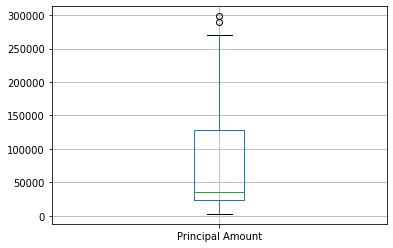

In [603]:
df.boxplot(column=['Principal Amount'])

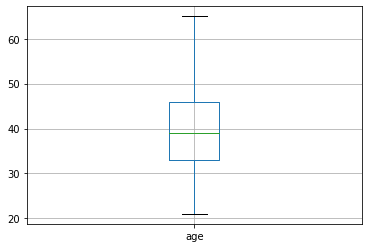

In [604]:
df = new_df[(new_df['age'] > lower_limit) & (new_df['age'] < upper_limit)]
df.boxplot(column=['age'])

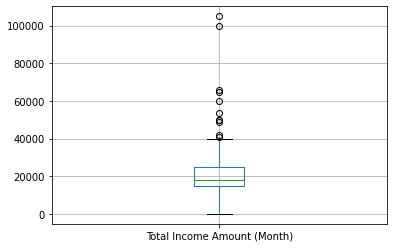

In [605]:
df = new_df[(new_df['Total Income Amount (Month)'] > lower_limit) & (new_df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

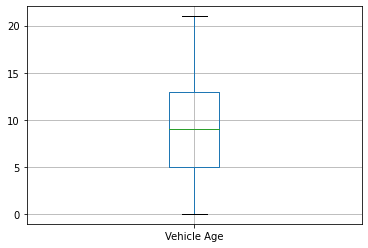

In [606]:
df = new_df[(new_df['Vehicle Age'] > lower_limit) & (new_df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [607]:
train_df = df.drop(columns=['Application Number']) ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Application Status']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Application Status']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


IndexError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s

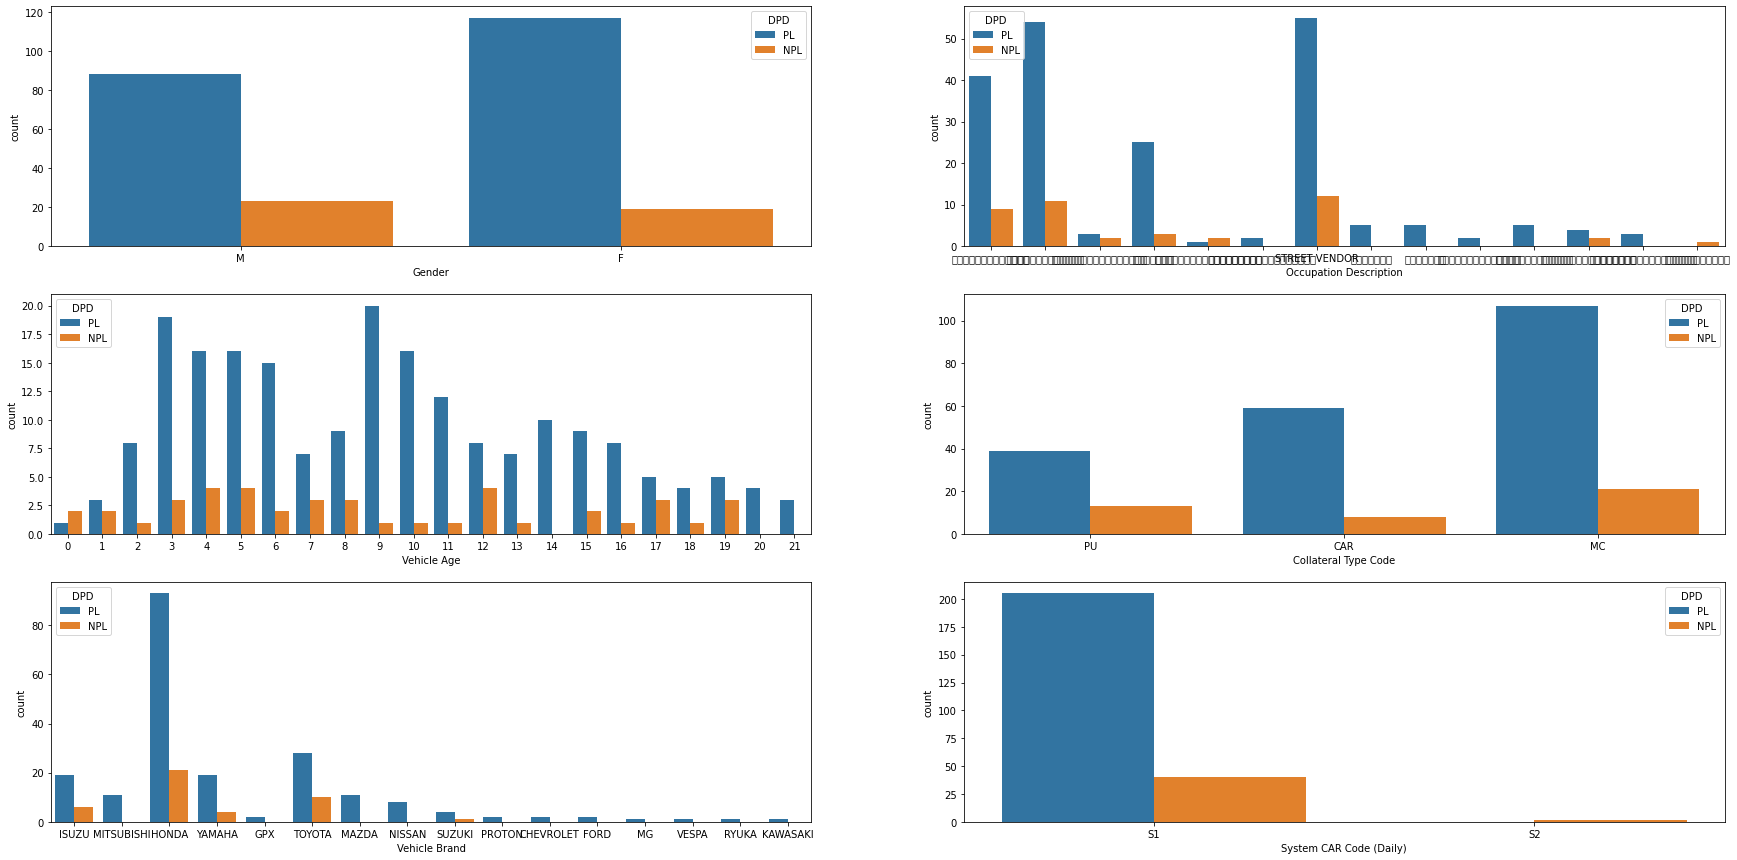

In [608]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(3,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

IndexError: ignored

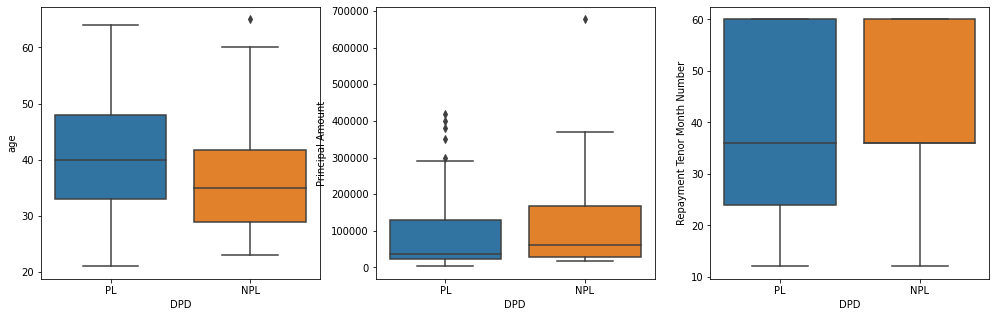

In [609]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [610]:
cols = ['Principal Approve Amount','Principal Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']

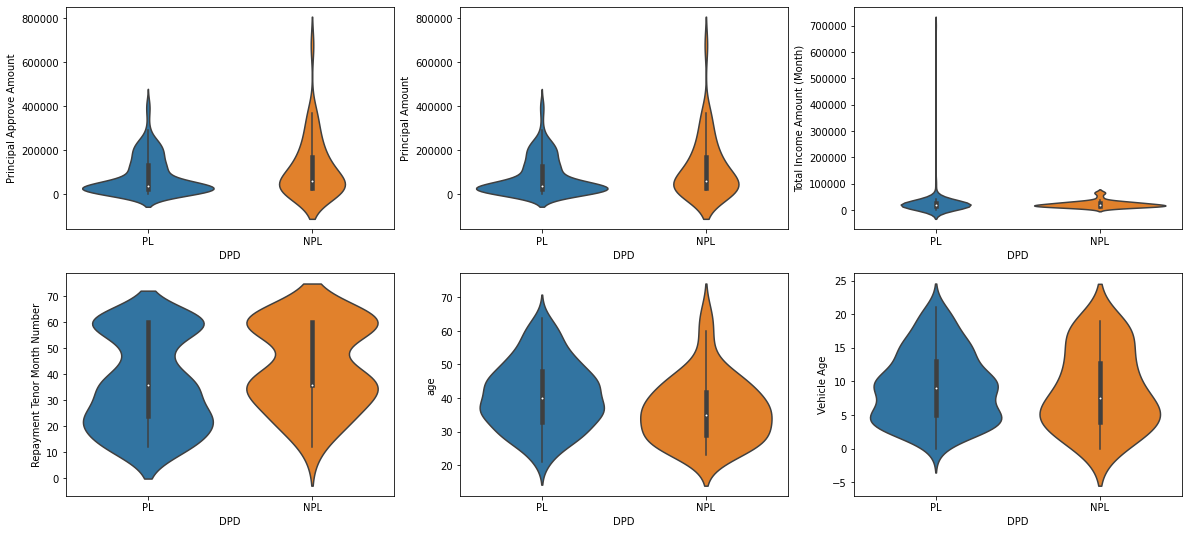

In [611]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

#Decision Tree

In [612]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [613]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'DOB', 'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'Insurance Policy Number', 'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month', 'DPD',
       'Application Status', 'age', 'Vehicle Age'],
      dtype='object')

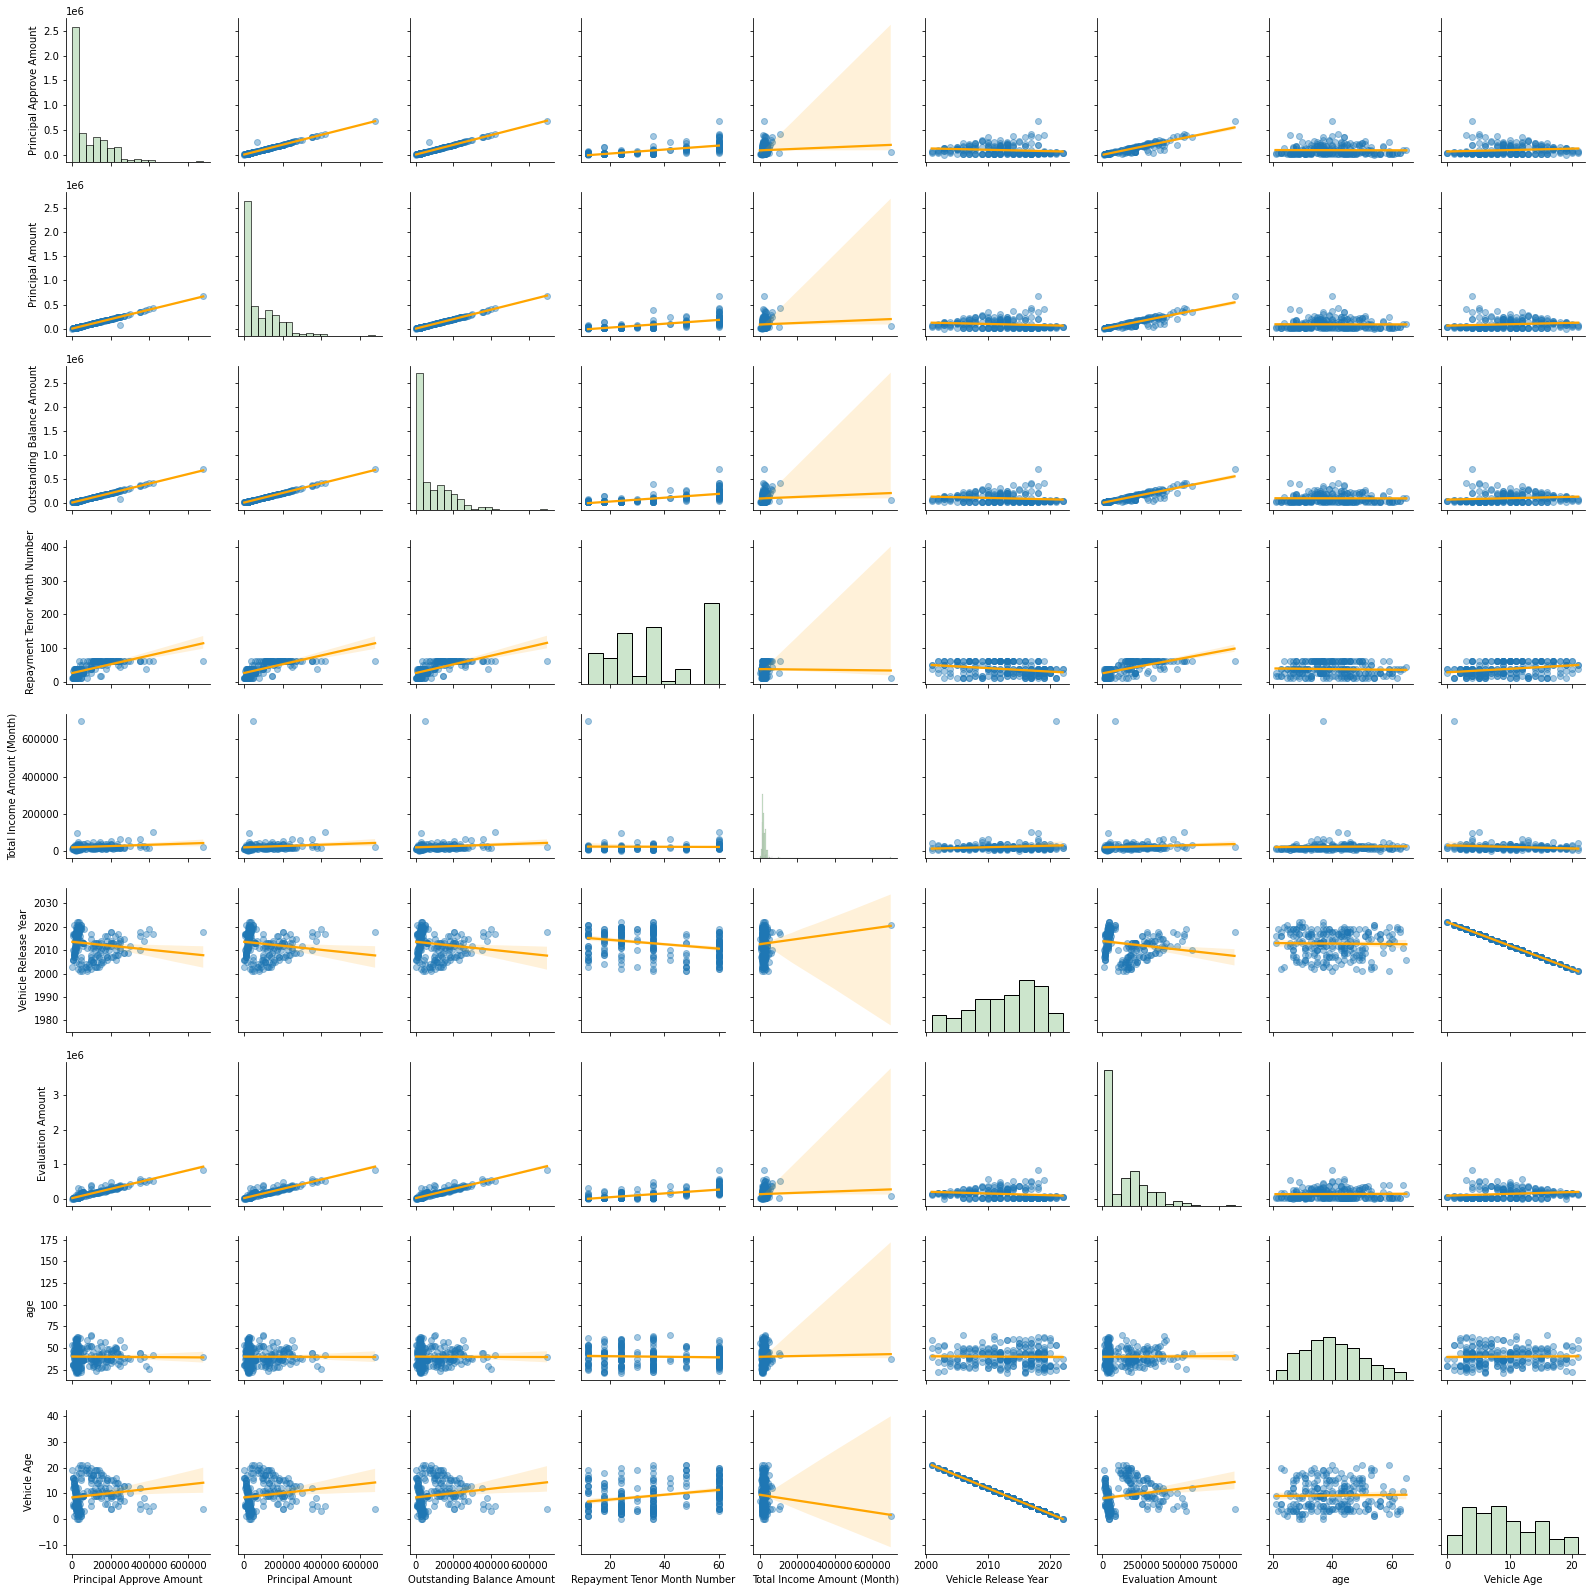

In [614]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [615]:
X=df[cols] #features
y = df['DPD'] #label

In [616]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)

In [617]:
from sklearn import tree

In [618]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [619]:
X_train.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Total Income Amount (Month)', 'Repayment Tenor Month Number', 'age',
       'Vehicle Age'],
      dtype='object')

In [620]:
model.feature_importances_

array([0.16208057, 0.27110581, 0.1234511 , 0.07196603, 0.18571087,
       0.18568562])

In [621]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Principal Amount                0.271106
age                             0.185711
Vehicle Age                     0.185686
Principal Approve Amount        0.162081
Total Income Amount (Month)     0.123451
Repayment Tenor Month Number    0.071966
dtype: float64

In [622]:
fs.sum()

0.9999999999999999

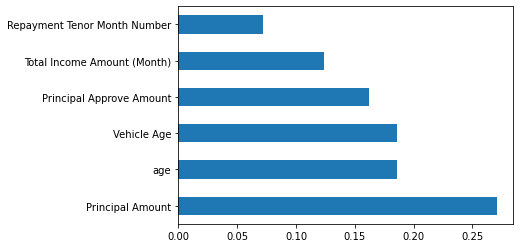

In [623]:
fs.plot(kind='barh')

In [624]:
y_train.value_counts()

PL     164
NPL     33
Name: DPD, dtype: int64

In [625]:
X = df[['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)']]
y = df['DPD']

In [626]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

(172, 7)

In [627]:
'''#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)'''

'#feature scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc = sc_X.fit(X_train)\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)'

In [628]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [629]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.7733333333333333


[Text(0.6754385964912281, 0.9722222222222222, 'node #0\nPrincipal Amount <= 17674.38\nentropy = 0.668\nsamples = 172\nvalue = [30, 142]\nclass = PL'),
 Text(0.6403508771929824, 0.9166666666666666, 'node #1\nentropy = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = PL'),
 Text(0.7105263157894737, 0.9166666666666666, 'node #2\nPrincipal Approve Amount <= 245000.0\nentropy = 0.719\nsamples = 151\nvalue = [30, 121]\nclass = PL'),
 Text(0.5263157894736842, 0.8611111111111112, 'node #3\nPrincipal Amount <= 29135.16\nentropy = 0.664\nsamples = 139\nvalue = [24, 115]\nclass = PL'),
 Text(0.3333333333333333, 0.8055555555555556, 'node #4\nRepayment Tenor Month Number <= 30.0\nentropy = 0.89\nsamples = 39\nvalue = [12, 27]\nclass = PL'),
 Text(0.17543859649122806, 0.75, 'node #5\nVehicle Age <= 5.5\nentropy = 0.677\nsamples = 28\nvalue = [5, 23]\nclass = PL'),
 Text(0.14035087719298245, 0.6944444444444444, 'node #6\nage <= 35.0\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]\nclass = PL'),
 Text(0.07

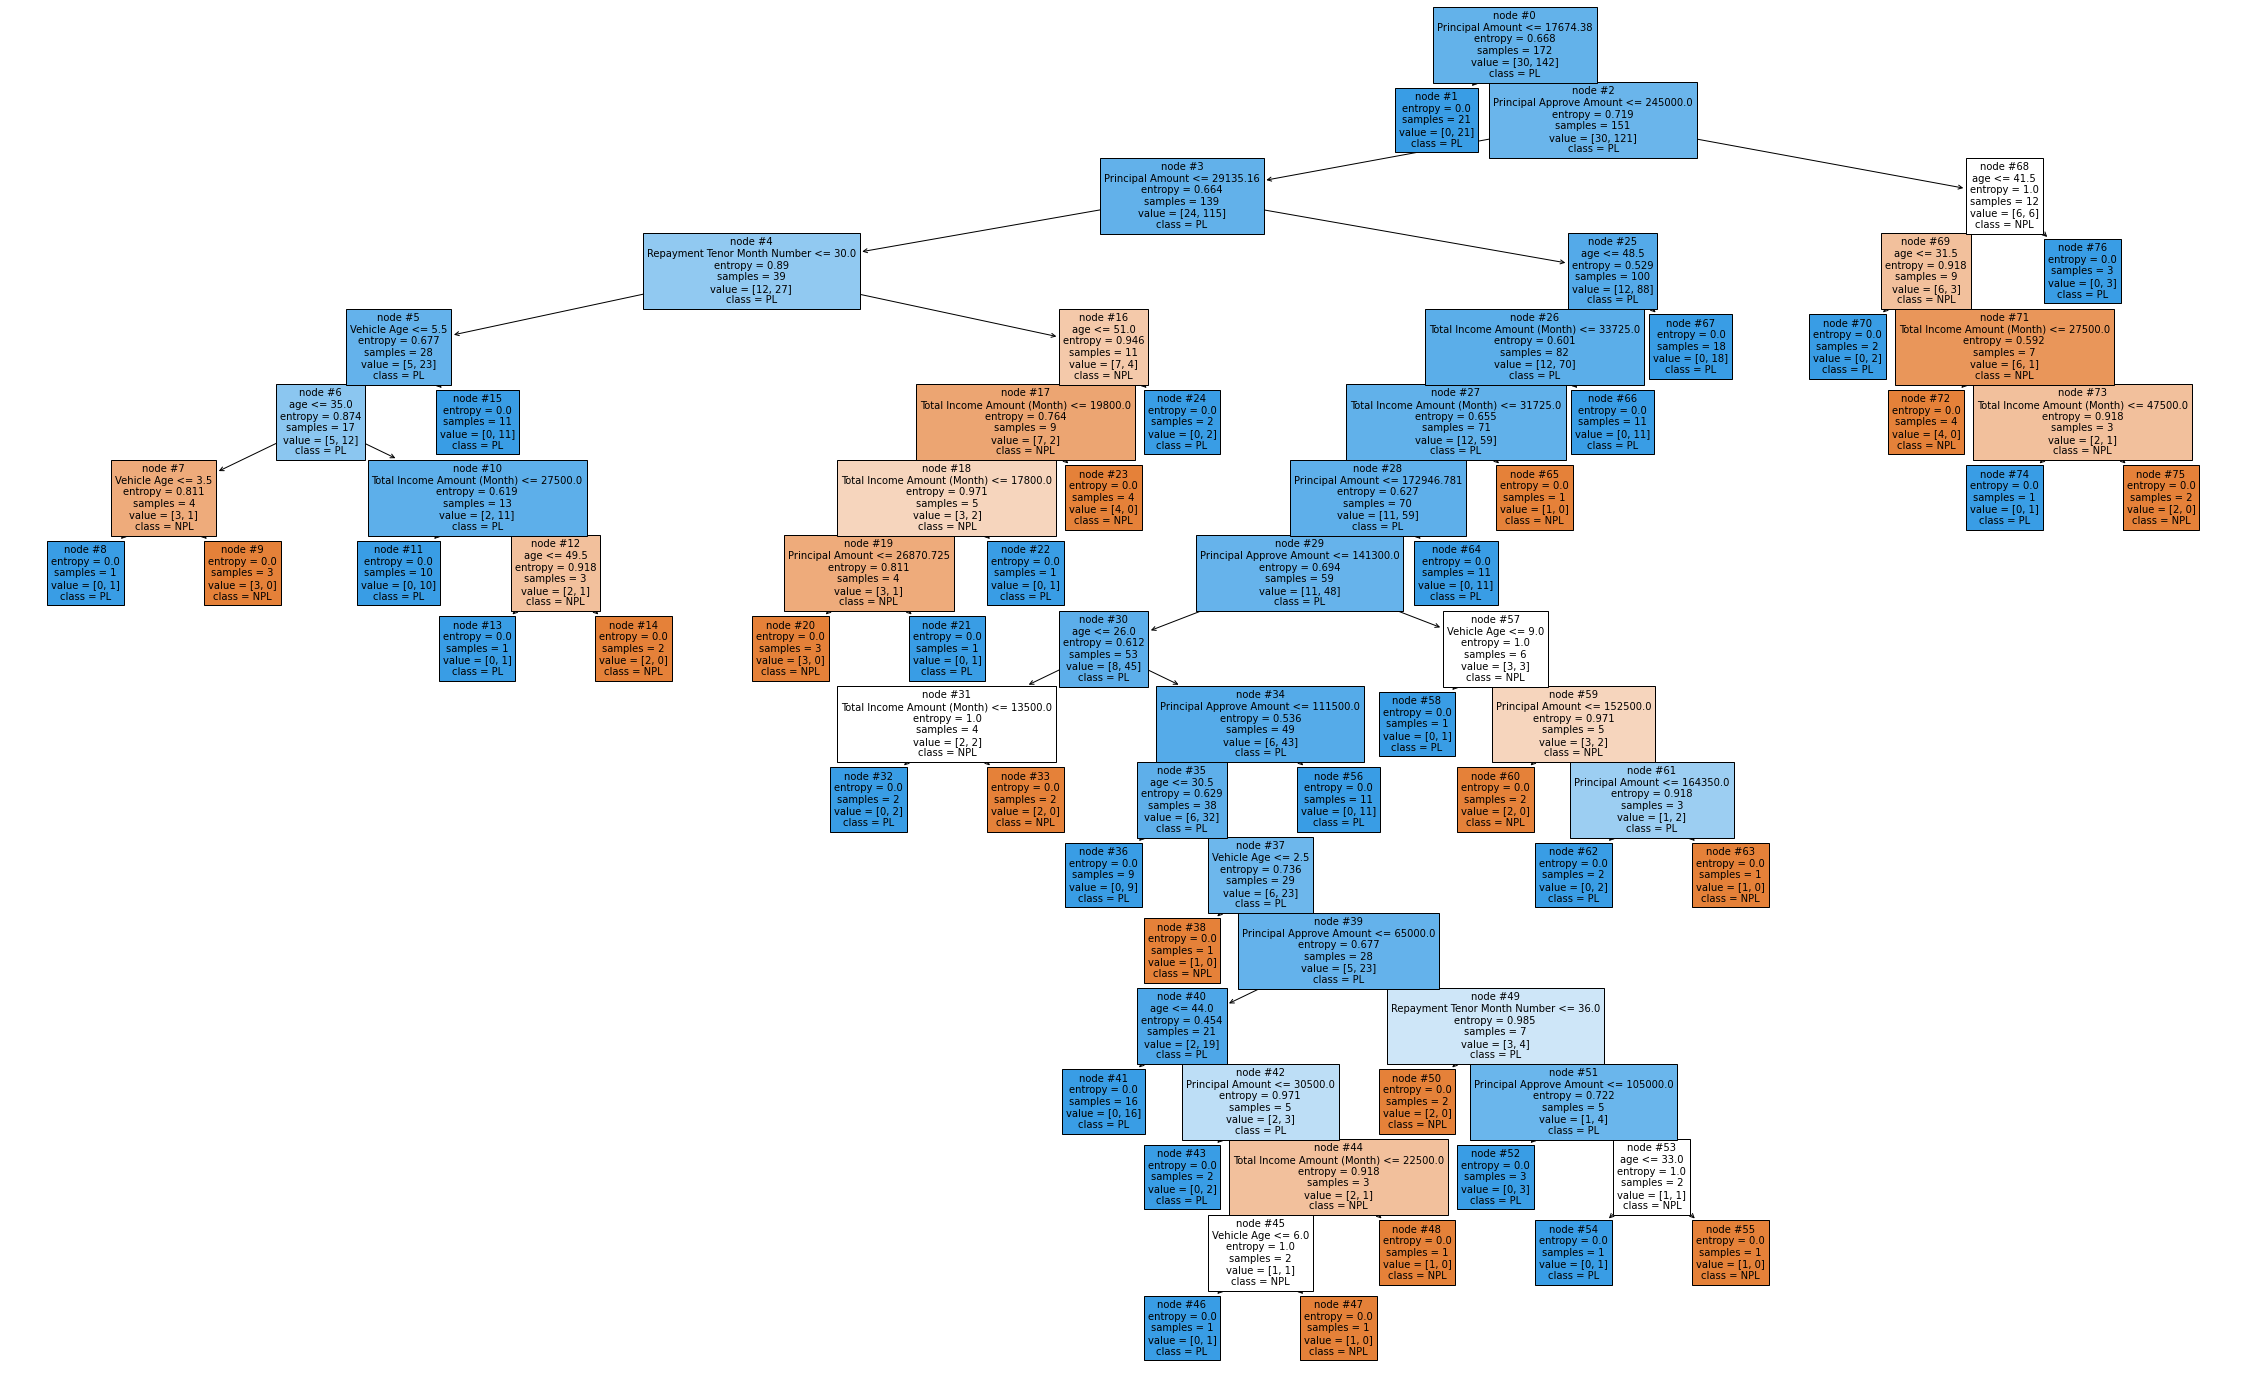

In [630]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [631]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=6)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8533333333333334


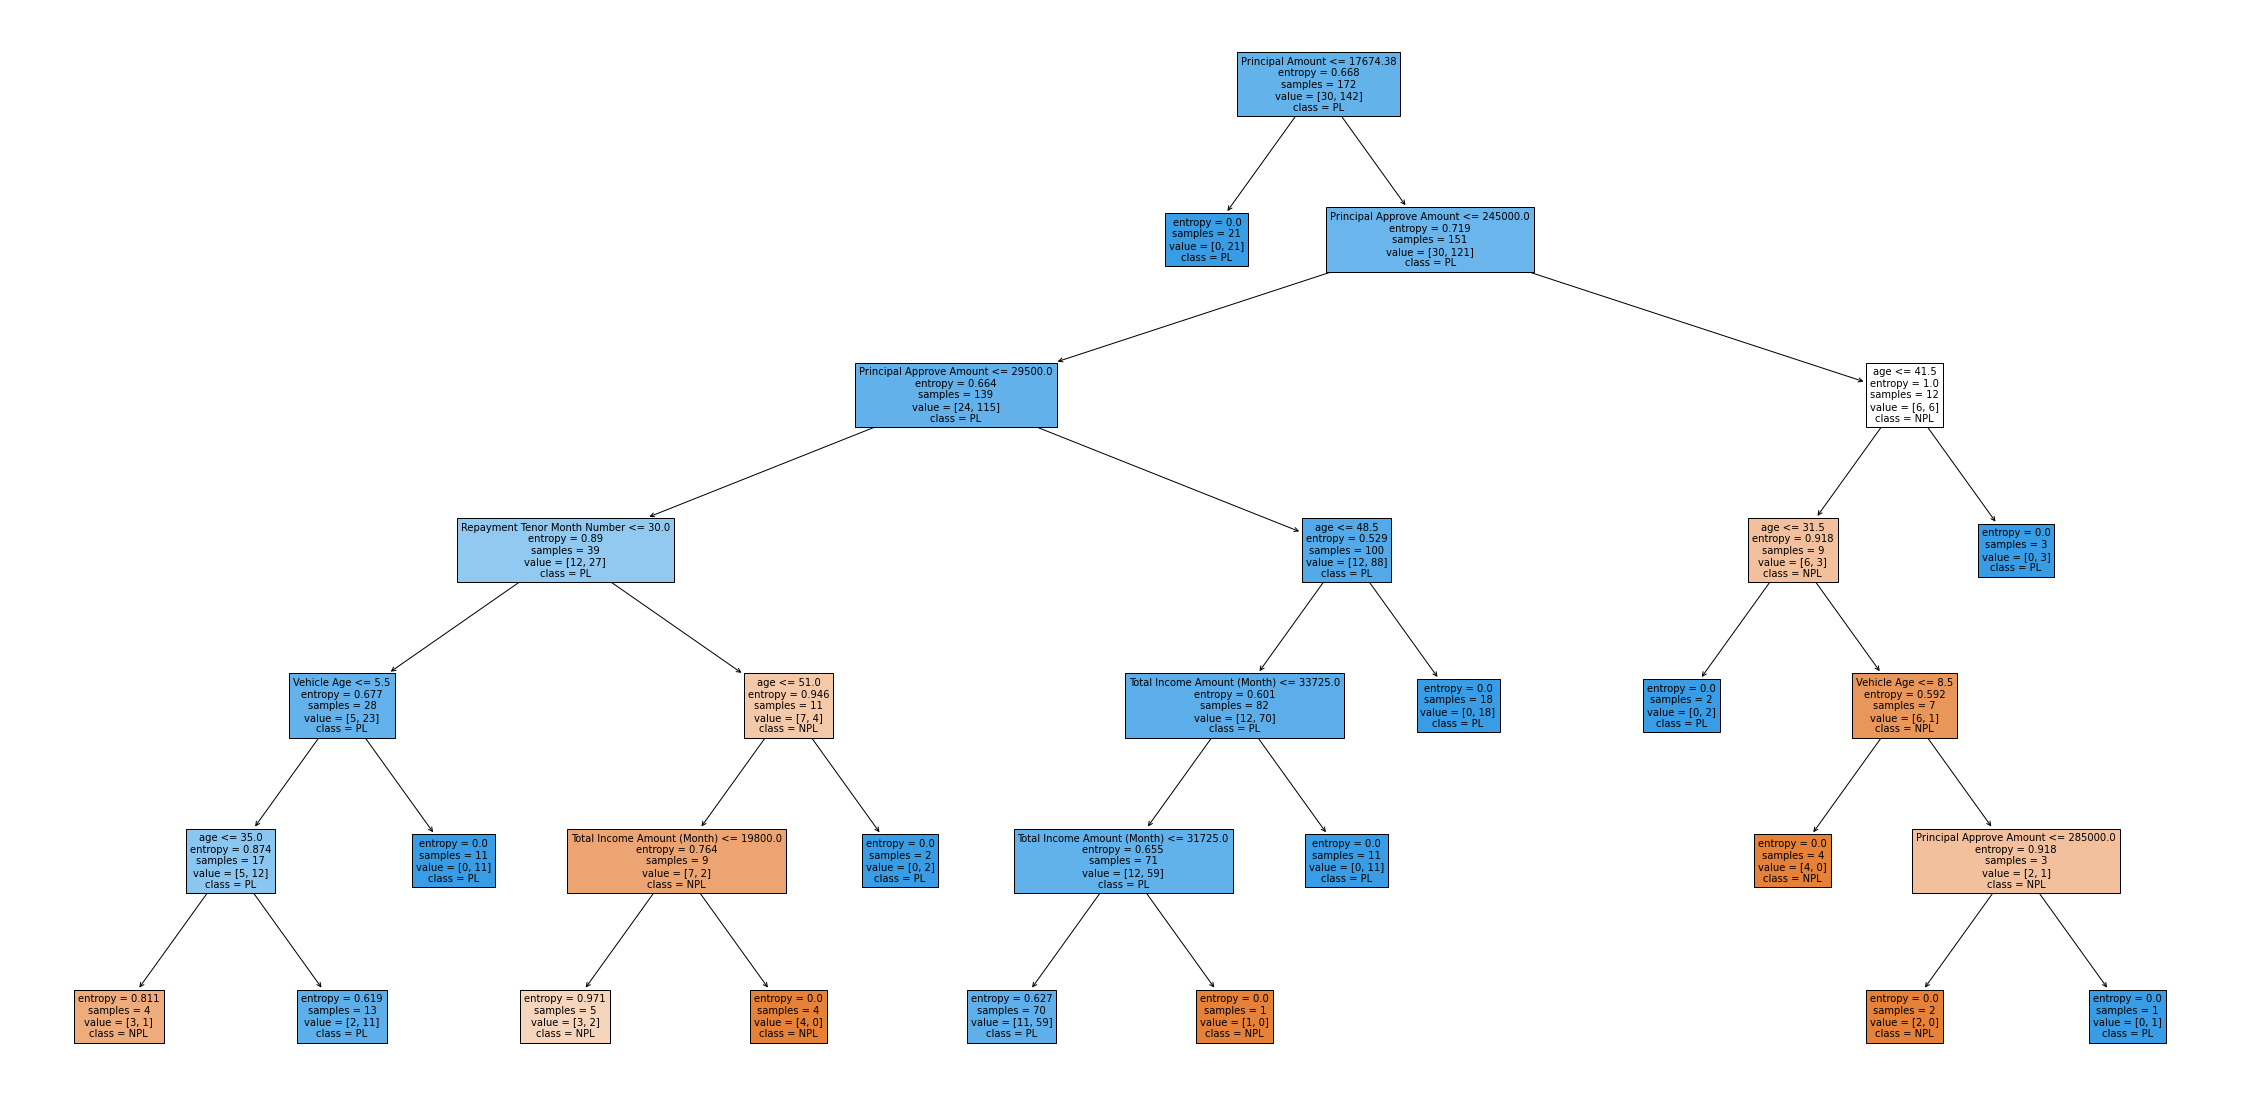

In [632]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)'],  
                   class_names=['NPL','PL'],
                   filled=True, fontsize=10)

In [633]:
import graphviz

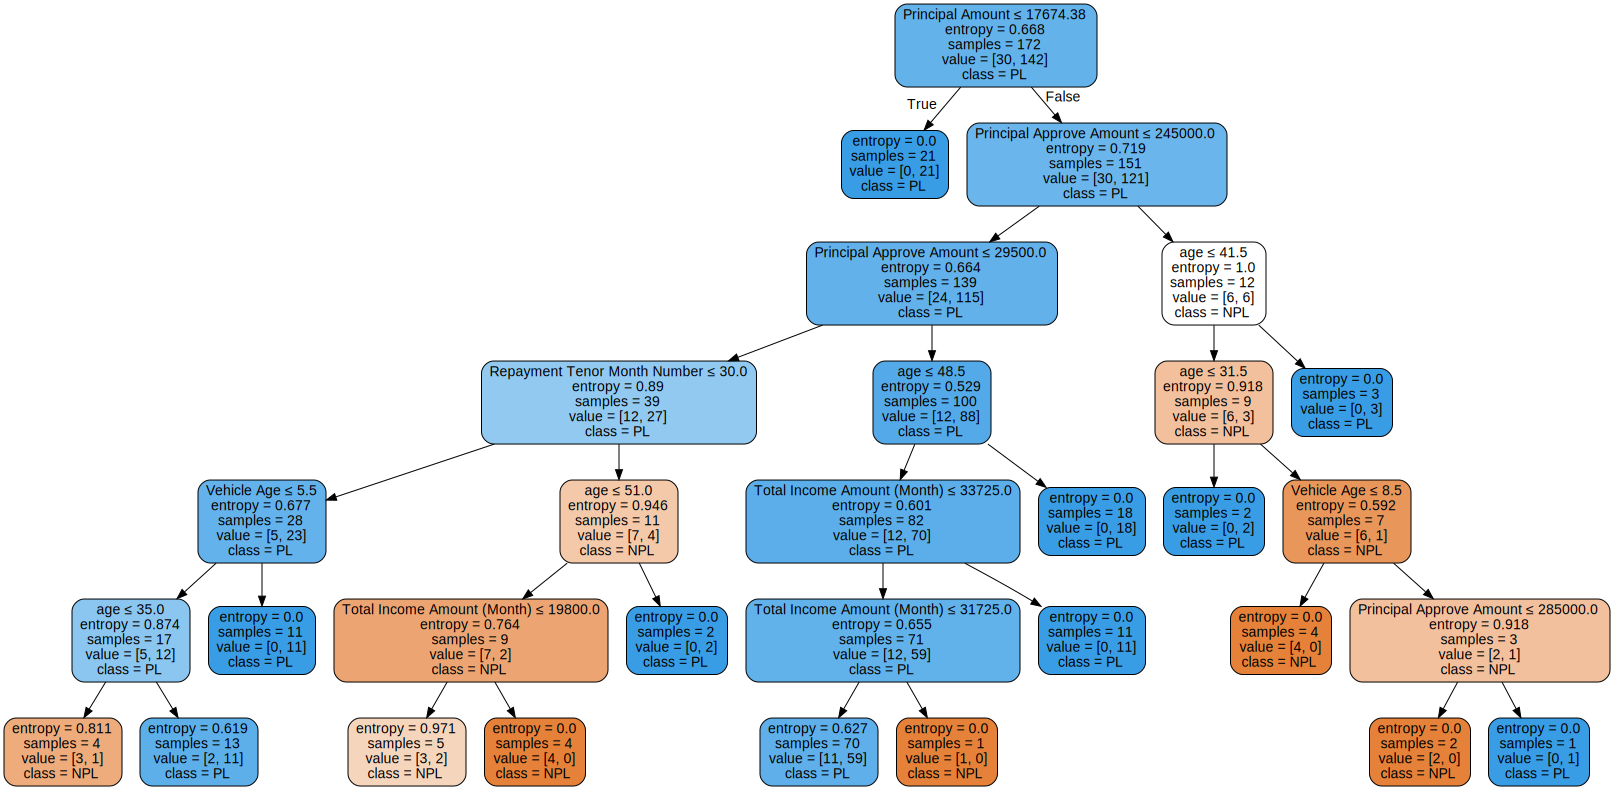

In [634]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)'],  
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [635]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/IS/chaiyo22.xlsx')

In [636]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [637]:
model = RandomForestClassifier(n_estimators=250, random_state=7)
classifier = model.fit(X_train,y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=7)

In [638]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.84


In [639]:
model.feature_importances_

array([0.14940228, 0.18415458, 0.1984983 , 0.05542712, 0.06001477,
       0.19231899, 0.16018398])

In [641]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = RandomForestClassifier(n_estimators=250, random_state=7)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84
